## 1. 导库


In [1]:
import os

import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pysal.lib as pslib
import seaborn as sns
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW
from pysal.explore import esda
from scipy import stats

D:\Anaconda3\envs\lab\lib\site-packages\pysal\lib\cg\alpha_shapes.py:34: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
D:\Anaconda3\envs\lab\lib\site-packages\pysal\lib\cg\alpha_shapes.py:155: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
D:\Anaconda3\envs\lab\lib\site-packages\pysal\lib\cg\alpha_shapes.py:188: NumbaDe

## 2. 获取研究所需的变量数据

In [2]:
data = pd.read_csv('filtered_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRI        2275 non-null   int64  
 1   FAR        2275 non-null   float64
 2   PRO        2275 non-null   float64
 3   GRE        2275 non-null   float64
 4   BUS        2275 non-null   float64
 5   HOS        2275 non-null   float64
 6   MAR        2275 non-null   float64
 7   SUB        2275 non-null   float64
 8   PSC        2275 non-null   float64
 9   MSC        2275 non-null   float64
 10  PAR        2275 non-null   float64
 11  CBD        2275 non-null   float64
 12  SCBD       2275 non-null   float64
 13  RIV        2275 non-null   float64
 14  ARE        2275 non-null   int64  
 15  latitude   2275 non-null   float64
 16  longitude  2275 non-null   float64
dtypes: float64(15), int64(2)
memory usage: 302.3 KB


In [4]:
data.columns

Index(['PRI', 'FAR', 'PRO', 'GRE', 'BUS', 'HOS', 'MAR', 'SUB', 'PSC', 'MSC',
       'PAR', 'CBD', 'SCBD', 'RIV', 'ARE', 'latitude', 'longitude'],
      dtype='object')

In [5]:
research_data = data[['PRI', 'FAR', 'PRO', 'GRE', 'BUS', 'SUB', 'HOS', 'PSC', 'MSC',
       'PAR', 'CBD', 'SCBD', 'MAR', 'ARE', 'RIV']]
research_data_with_coords = data[['PRI', 'FAR', 'PRO', 'GRE', 'BUS', 'SUB', 'HOS', 'PSC', 'MSC','PAR', 'CBD', 'SCBD', 'MAR', 'ARE', 'RIV','latitude', 'longitude']]

## 3. 描述性统计

In [6]:
research_data.describe()

,PRI,FAR,PRO,GRE,BUS,SUB,HOS,PSC,MSC,PAR,CBD,SCBD,MAR,ARE,RIV
count,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000,2275.000000
mean,40265.196044,2.447719,1.273877,26.923596,178.081320,595.729913,882.344922,340.722377,493.817072,579.083508,5007.197151,2908.756391,379.584516,283547.428571,2094.531037
std,15112.900605,1.426234,1.249688,9.298455,113.118881,324.145101,619.461553,221.901228,272.132126,320.863170,2058.702537,1455.495795,242.456110,148805.705418,1272.970961
min,9400.000000,0.300000,0.200000,10.000000,1.430147,5.260690,3.009808,18.551159,15.528311,29.729466,232.514434,134.606593,7.658327,100.000000,1.212449
25%,28200.000000,1.500000,0.600000,20.000000,91.921348,389.982119,538.789008,186.120085,271.812099,318.336612,3499.263205,1905.475489,215.988942,187700.000000,1345.186813
50%,37629.000000,2.180000,0.900000,30.000000,148.633863,581.874580,844.907028,258.131864,488.507183,579.577494,4617.631612,2831.397885,353.243865,256100.000000,2104.807143
75%,50000.000000,2.825000,1.500000,30.000000,227.702707,755.667747,1067.626399,463.104062,728.320044,710.119046,6210.706534,3528.463636,524.660571,379150.000000,2505.776720
max,85387.000000,9.490000,15.000000,80.000000,898.283853,2736.739861,6997.196089,1572.544640,1822.042293,1777.510271,12916.760677,10868.734624,2491.511105,824700.000000,11516.574452


### 3.1 变量分布直方图

In [7]:
def hist_describe(column_name):
    plt.title=(f'{column_name} Histogram')
    sns.histplot(research_data[column_name], kde=True)
    plt.savefig(f'describe/hist_plot/{column_name}_hist.png')
    plt.close()

In [8]:
for column_name in research_data.columns:
    hist_describe(column_name)

### 3.2 变量相关性分析

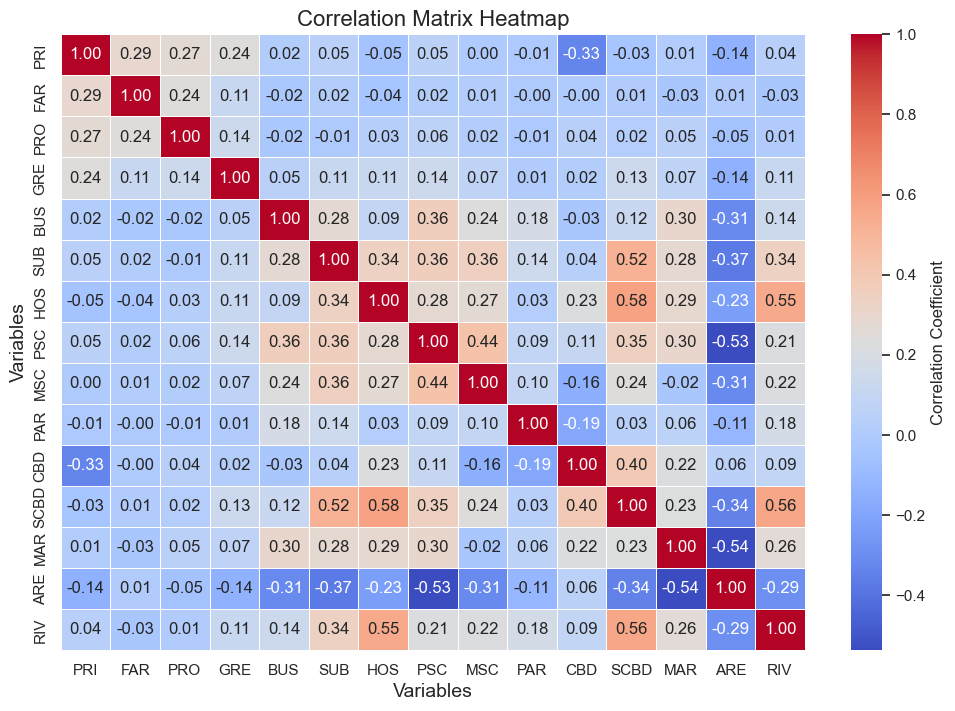

In [9]:
# 计算相关性矩阵
correlation_matrix = research_data.corr()

# 设置绘图风格
sns.set(style="whitegrid")

# 创建一个更大的图形
plt.figure(figsize=(12, 8))

# 绘制热力图
hm = sns.heatmap(
    correlation_matrix,  # 数据集
    annot=True,          # 显示数字
    cmap='coolwarm',     # 颜色映射
    linewidths=0.5,      # 网格线宽度
    linecolor='white',   # 网格线颜色
    cbar=True,           # 显示颜色条
    cbar_kws={'label': 'Correlation Coefficient'},  # 颜色条标签
    fmt=".2f"            # 精度格式
)

# 设置标题
hm.set_title('Correlation Matrix Heatmap', fontsize=16)

# 设置坐标轴标签字体大小
hm.set_xlabel('Variables', fontsize=14)
hm.set_ylabel('Variables', fontsize=14)

# 设置注释字体大小
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 显示图形
plt.savefig('describe/corr/correlation_matrix.png')

## 4. 空间自相关分析

### 4.1 读取转化数据

In [10]:
crs = 'epsg:4490'
geometry = gpd.points_from_xy(research_data_with_coords.longitude, research_data_with_coords.latitude)

In [11]:
gdf = gpd.GeoDataFrame(research_data, crs=crs, geometry=geometry)

In [12]:
gdf.head()

,PRI,FAR,PRO,GRE,BUS,SUB,HOS,PSC,MSC,PAR,CBD,SCBD,MAR,ARE,RIV,geometry
0,54560,2.88,1.20,30.0,256.509826,1196.714612,1535.484711,417.639070,856.055562,161.120353,9319.496930,7467.040911,175.643977,333600,2068.596693,POINT (113.41570 23.12433)
1,70093,3.80,3.50,62.0,256.509826,1196.714612,1535.484711,417.639070,856.055562,161.120353,9319.496930,7467.040911,175.643977,333600,2068.596693,POINT (113.41570 23.12433)
2,45544,1.74,2.37,40.0,152.513554,1207.328398,2100.395942,388.567987,383.483784,703.540475,9796.623781,8166.680740,451.259944,69400,3059.158674,POINT (113.41957 23.13246)
3,58641,2.66,1.90,45.2,23.832257,713.996616,5297.997351,423.282983,382.525096,362.763426,9674.438398,9123.633151,346.016106,356900,9463.923434,POINT (113.36996 23.19682)
4,84828,3.99,2.30,42.0,219.307358,1482.307992,265.723923,433.038452,1132.855629,1241.665762,4742.191821,4540.610699,300.167413,210700,3082.062562,POINT (113.36633 23.13916)


In [13]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PRI       2275 non-null   int64   
 1   FAR       2275 non-null   float64 
 2   PRO       2275 non-null   float64 
 3   GRE       2275 non-null   float64 
 4   BUS       2275 non-null   float64 
 5   SUB       2275 non-null   float64 
 6   HOS       2275 non-null   float64 
 7   PSC       2275 non-null   float64 
 8   MSC       2275 non-null   float64 
 9   PAR       2275 non-null   float64 
 10  CBD       2275 non-null   float64 
 11  SCBD      2275 non-null   float64 
 12  MAR       2275 non-null   float64 
 13  ARE       2275 non-null   int64   
 14  RIV       2275 non-null   float64 
 15  geometry  2275 non-null   geometry
dtypes: float64(13), geometry(1), int64(2)
memory usage: 284.5 KB


### 4.2 确定空间权重矩阵

In [14]:
df = research_data
df['geometry'] = gdf['geometry'].apply(lambda p: (p.x, p.y))

C:\Users\Mariooo\AppData\Local\Temp\ipykernel_32752\3262595228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['geometry'] = gdf['geometry'].apply(lambda p: (p.x, p.y))


In [15]:
# 距离阈值法构建空间权重矩阵
w = pslib.weights.DistanceBand.from_dataframe(df, threshold=0.05, ids=gdf.index)

### 4.3 全局自相关分析——Moran's I

In [16]:
# 计算Moran's I指数，假设价格字段为'price'
moran_i = esda.Moran(gdf['PRI'], w)
print('Moran\'s I:', moran_i.I)

Moran's I: 0.07472485427672607


In [17]:
# 计算Z得分
z_score = moran_i.z_norm
print('Z-score:', z_score)
# 根据Z得分判断显著性（假设显著性水平为0.01）
if abs(z_score) > 2.58:
    print('Moran\'s I is significant at the 0.01 level.')
else:
    print('Moran\'s I is not significant at the 0.01 level.')

Z-score: 83.80482272143774
Moran's I is significant at the 0.01 level.


### 4.4 局部空间自相关分析——LISA

In [18]:
lisa = esda.moran.Moran_Local(gdf.PRI, w)

In [19]:
# 将LISA集聚类型添加到数据中
gdf['lisa_type'] = lisa.q

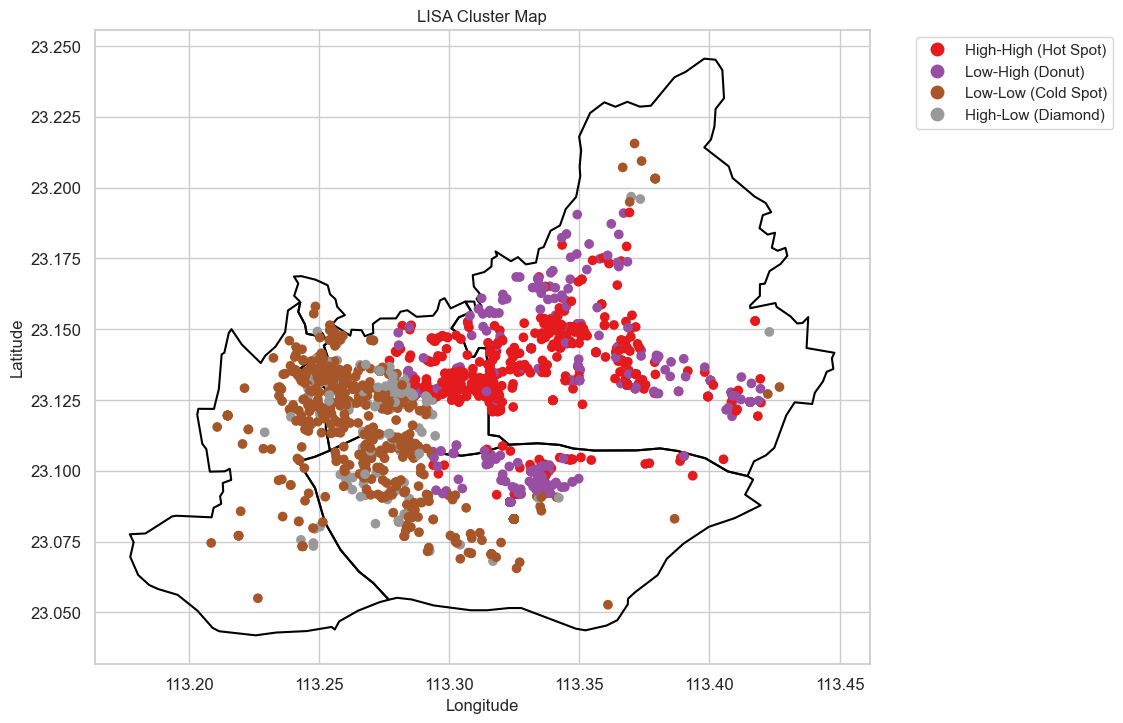

In [20]:
# 定义颜色映射
cmap = plt.get_cmap('Set1')
# 定义集聚类型的解释
lisa_labels = {
    1: 'High-High (Hot Spot)',
    2: 'Low-High (Donut)',
    3: 'Low-Low (Cold Spot)',
    4: 'High-Low (Diamond)'
}
# 绘制LISA集聚图
fig, ax = plt.subplots(figsize=(10, 10))

center_city_boundary = gpd.read_file('describe/广州市/central_canton.shp')
# 先绘制广州市中心城区边界
center_city_boundary.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)

gdf.plot(column='lisa_type', categorical=True, ax=ax, cmap=cmap, legend=True, legend_kwds={'loc': 'upper left'})

# 添加标题和坐标轴标签
ax.set_title('LISA Cluster Map')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# 调整图例位置
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.05, 1))

# 自定义图例标签
for i, label in lisa_labels.items():
    leg.get_texts()[i-1].set_text(label)

# 保存图形
plt.savefig('LISA/lisa_cluster.png', bbox_inches='tight')
plt.show()

In [21]:
plt.close()

## 5. GWR模型

In [22]:
independent_variables = ['FAR', 'PRO', 'GRE', 'BUS', 'SUB', 'HOS', 'PSC', 'MSC','PAR', 'CBD', 'SCBD', 'MAR', 'ARE', 'RIV']
dependent_variable = 'PRI'

In [23]:
GWR_data = research_data_with_coords

In [24]:
GWR_data.head()

,PRI,FAR,PRO,GRE,BUS,SUB,HOS,PSC,MSC,PAR,CBD,SCBD,MAR,ARE,RIV,latitude,longitude
0,54560,2.88,1.20,30.0,256.509826,1196.714612,1535.484711,417.639070,856.055562,161.120353,9319.496930,7467.040911,175.643977,333600,2068.596693,23.124325,113.415697
1,70093,3.80,3.50,62.0,256.509826,1196.714612,1535.484711,417.639070,856.055562,161.120353,9319.496930,7467.040911,175.643977,333600,2068.596693,23.124325,113.415697
2,45544,1.74,2.37,40.0,152.513554,1207.328398,2100.395942,388.567987,383.483784,703.540475,9796.623781,8166.680740,451.259944,69400,3059.158674,23.132456,113.419568
3,58641,2.66,1.90,45.2,23.832257,713.996616,5297.997351,423.282983,382.525096,362.763426,9674.438398,9123.633151,346.016106,356900,9463.923434,23.196825,113.369955
4,84828,3.99,2.30,42.0,219.307358,1482.307992,265.723923,433.038452,1132.855629,1241.665762,4742.191821,4540.610699,300.167413,210700,3082.062562,23.139163,113.366326


In [25]:
# 删除重复的行，根据 'latitude' 和 'longitude' 列判断
GWR_data = GWR_data.drop_duplicates(subset=['latitude', 'longitude'])

In [26]:
# 将数据类型转换为浮点数
GWR_data = GWR_data.astype(float)

In [27]:
GWR_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1187 entries, 0 to 2274
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRI        1187 non-null   float64
 1   FAR        1187 non-null   float64
 2   PRO        1187 non-null   float64
 3   GRE        1187 non-null   float64
 4   BUS        1187 non-null   float64
 5   SUB        1187 non-null   float64
 6   HOS        1187 non-null   float64
 7   PSC        1187 non-null   float64
 8   MSC        1187 non-null   float64
 9   PAR        1187 non-null   float64
 10  CBD        1187 non-null   float64
 11  SCBD       1187 non-null   float64
 12  MAR        1187 non-null   float64
 13  ARE        1187 non-null   float64
 14  RIV        1187 non-null   float64
 15  latitude   1187 non-null   float64
 16  longitude  1187 non-null   float64
dtypes: float64(17)
memory usage: 166.9 KB


In [28]:
# 提取自变量和因变量
coords = list(zip(GWR_data['longitude'], GWR_data['latitude']))
y = np.array(GWR_data[dependent_variable]).reshape(-1, 1)
X = np.hstack([np.array(GWR_data[var]).reshape(-1,1) for var in independent_variables])

In [29]:
# 选择带宽
bw = Sel_BW(coords, y, X ,kernel='gaussian').search()

In [30]:
# 进行GWR分析
gwr_model = GWR(coords, y, X, bw=bw, kernel='gaussian').fit()
# 查看GWR模型的参数估计
gwr_model.params

array([[ 3.36420866e+04,  2.13516136e+03,  5.74580480e+03, ...,
        -8.60698228e-01,  4.77446938e-03, -5.99616475e-01],
       [ 3.44562306e+04,  2.15039190e+03,  5.44713491e+03, ...,
        -6.78782563e-01,  4.56929969e-03, -6.56648084e-01],
       [ 4.40806268e+04,  2.25304595e+03,  3.07942950e+03, ...,
        -7.80471656e-01, -1.68851891e-05, -1.23180621e+00],
       ...,
       [ 4.06046967e+04,  2.53014250e+03,  1.08642044e+03, ...,
        -5.15297457e+00, -3.48905656e-03,  5.22142936e-01],
       [ 3.31046017e+04,  2.24466241e+03,  1.37676612e+03, ...,
        -5.38875793e+00,  6.07165384e-04, -1.59962591e-01],
       [ 3.25296999e+04,  2.12973074e+03,  1.77392544e+03, ...,
        -7.43597335e+00,  4.01009080e-03,  3.44949942e+00]])

In [31]:
# 创建DataFrame
df = pd.DataFrame(gwr_model.params, columns=['Intercept'] + independent_variables)
# 计算统计量
summary_stats = df.describe().transpose()
# 选择需要的统计量
summary_stats = summary_stats[['max', 'min', '50%', 'mean', 'std']]
# 重命名列
summary_stats.columns = ['最大值', '最小值', '中位数', '平均数', '标准差']
# 输出表格
print(summary_stats)

                    最大值           最小值           中位数           平均数  \
Intercept  77179.067517  15248.167405  46893.894359  46060.053663   
FAR         3540.034978    459.133078   2166.373547   2109.826894   
PRO        10305.097715    629.996144   2096.073742   3159.187241   
GRE          316.526218     45.323730    193.072747    194.027967   
BUS           14.695535    -27.703058     -6.514450     -5.788165   
SUB           12.653706    -13.393945      1.543862      1.773176   
HOS           10.900768     -8.620595     -0.940882     -0.967645   
PSC           17.051970    -16.484169      4.635916      3.402949   
MSC           10.643706    -15.707559     -1.145408     -2.097947   
PAR            5.460525    -11.060164     -1.955131     -1.885316   
CBD            3.052884    -13.724466     -3.986391     -4.290120   
SCBD           7.036359     -9.514940      0.723070      0.142230   
MAR           13.265122     -9.633259     -0.048142      0.115698   
ARE            0.029383     -0.036

In [39]:
# 获取GWR模型的R²
R2 = gwr_model.R2
print(f"R²: {R2:.4f}")

R²: 0.6237


In [44]:
gwr_model.summary()

Model type                                                         Gaussian
Number of observations:                                                1187
Number of covariates:                                                    15

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                       172012767223.362
Log-likelihood:                                                  -12837.124
AIC:                                                              25704.249
AICc:                                                             25706.714
BIC:                                                           172012758926.558
R2:                                                                   0.366
Adj. R2:                                                              0.358

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------

In [61]:
# 提取回归系数和t值
coef_df = pd.DataFrame(gwr_model.params, columns=['Intercept'] + independent_variables)
t_values = pd.DataFrame(gwr_model.tvalues, columns=['Intercept'] + independent_variables)

# 计算p值
p_values = pd.DataFrame(2 * (1 - stats.t.cdf(abs(t_values), df=gwr_model.df_model)),
                        columns=['Intercept'] + independent_variables)
# 设定显著性水平
alpha = 0.05
# 输出各因素的p值和显著性水平
print("各因素的p值和显著性水平：")
significant_factors = []
for factor in p_values.columns:
    p_value = p_values[factor].values[0]
    significant = "显著" if p_value < alpha else "不显著"
    print(f"{factor}: p值 = {p_value:.4f}, {significant}")
    if p_value < alpha:
        significant_factors.append(factor)
    else:
        pass
significant_coef_df = coef_df[significant_factors].copy()

各因素的p值和显著性水平：
Intercept: p值 = 0.0000, 显著
FAR: p值 = 0.0000, 显著
PRO: p值 = 0.0000, 显著
GRE: p值 = 0.0000, 显著
BUS: p值 = 0.6491, 不显著
SUB: p值 = 0.0008, 显著
HOS: p值 = 0.0522, 不显著
PSC: p值 = 0.6240, 不显著
MSC: p值 = 0.3506, 不显著
PAR: p值 = 0.2681, 不显著
CBD: p值 = 0.0000, 显著
SCBD: p值 = 0.0026, 显著
MAR: p值 = 0.6879, 不显著
ARE: p值 = 0.3325, 不显著
RIV: p值 = 0.1019, 不显著


In [62]:
significant_coef_df = significant_coef_df.drop('Intercept', axis=1)
significant_coef_df.head()

,FAR,PRO,GRE,SUB,CBD,SCBD
0,2135.161363,5745.804801,270.836311,5.025477,-3.694545,1.549755
1,2150.391905,5447.134913,273.233106,5.038315,-3.748157,1.553966
2,2253.045948,3079.429498,262.272638,6.096404,-4.239568,1.294645
3,2236.928537,7763.017720,215.901666,5.493318,-5.721039,2.076178
4,1958.666142,2928.609625,236.598211,6.925343,-5.574985,2.175180


In [110]:
significant_coef_gdf = gpd.GeoDataFrame(significant_coef_df, geometry= gpd.points_from_xy(GWR_data.longitude, GWR_data.latitude))

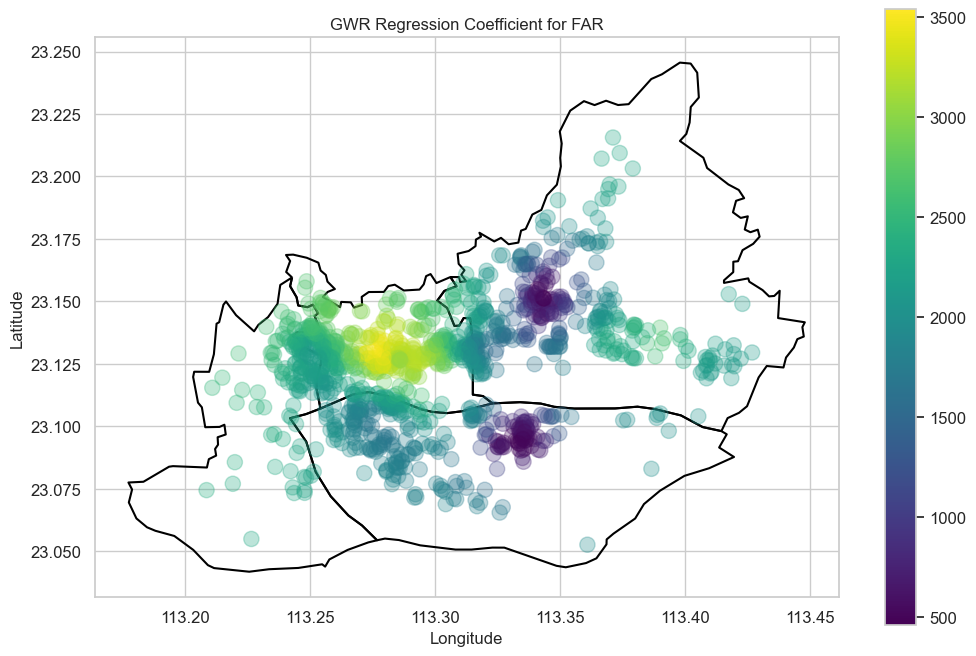

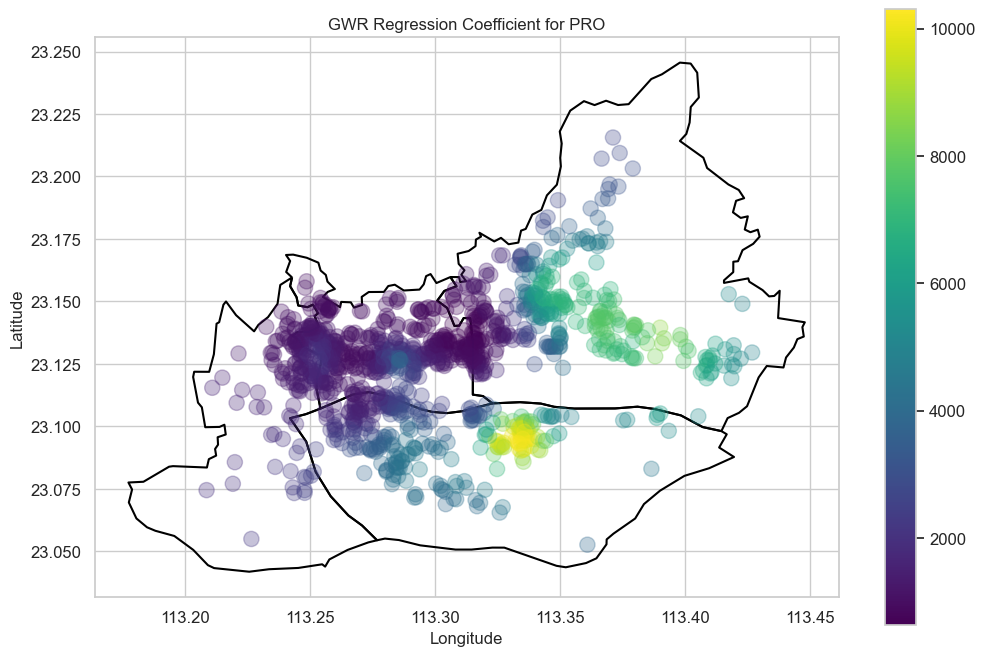

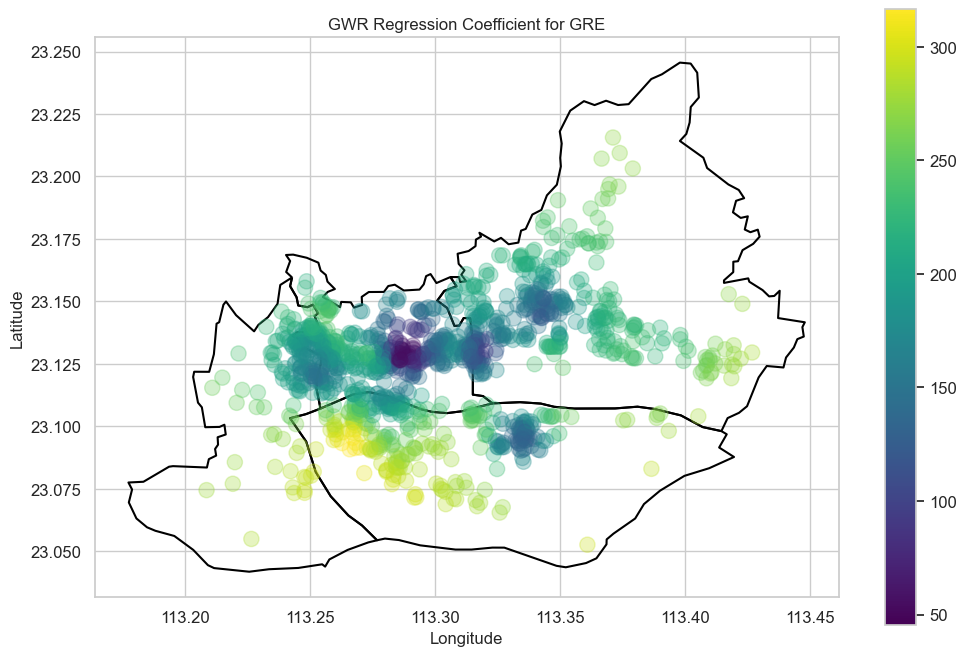

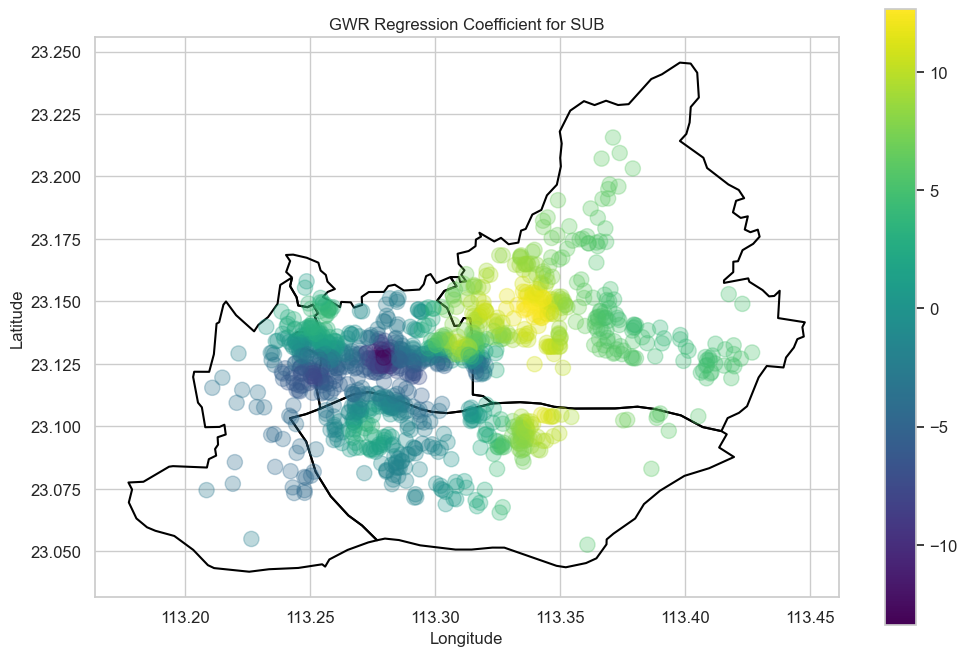

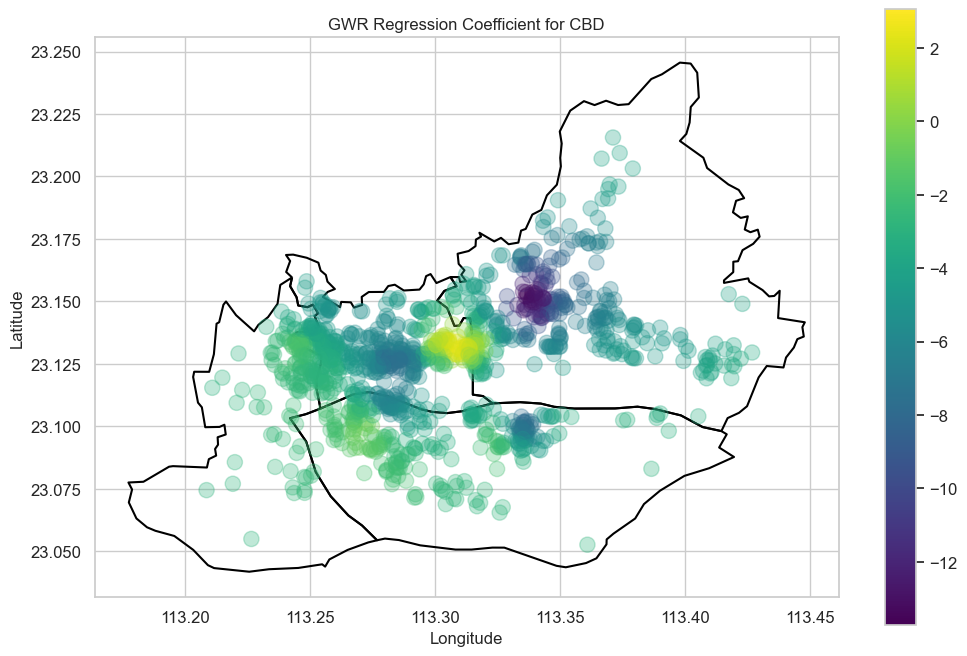

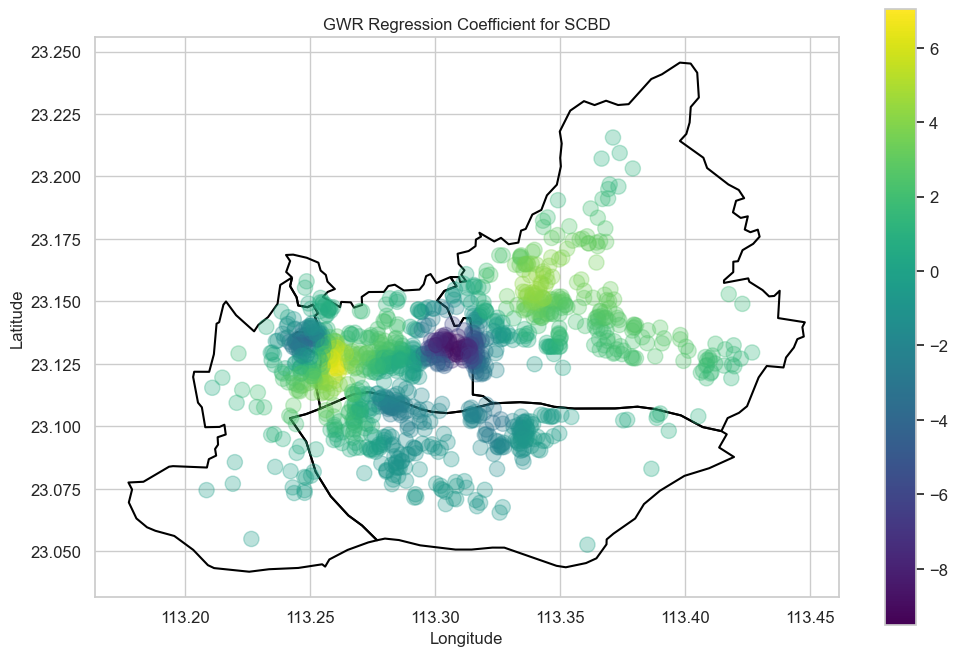

In [111]:
os.makedirs('GWR', exist_ok=True)
# 可视化显著因素的回归系数
for factor in significant_factors[1:]:
    fig, ax = plt.subplots(figsize=(12, 8))
    center_city_boundary.plot(ax=ax, color='none', edgecolor='black', linewidth=1.5)
    significant_coef_gdf.plot(column=factor, ax=ax, cmap='viridis', legend=True, markersize = 120, alpha=0.3)
    ax.set_title(f'GWR Regression Coefficient for {factor}')
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.savefig(f'GWR/gwr_coef_{factor}.png', bbox_inches='tight')
    plt.show()